In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader, TensorDataset 

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


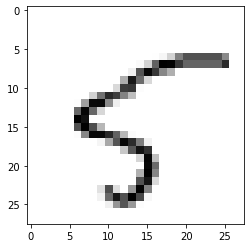

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

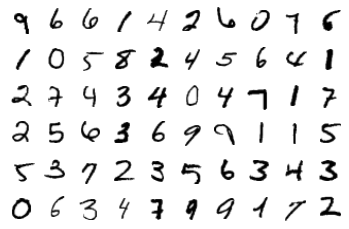

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
input_size = 784
hidden_sizes = [64, 128, 256]
output_size = 10 

print(hidden_sizes[2])

256


In [ ]:
import collections
orderedDict = collections.OrderedDict()

from collections import OrderedDict

In [ ]:
model = nn.Sequential(OrderedDict([
        ('lin0', nn.Linear(input_size, hidden_sizes[0])),
        ('relu0', nn.ReLU()),
        ('lin1', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
        ('relu1', nn.ReLU()),
        ('lin2', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
        ('relu2', nn.ReLU()),
        ('lin3', nn.Linear(hidden_sizes[2], hidden_sizes[1])),
        ('relu3', nn.ReLU()),
        ('lin4', nn.Linear(hidden_sizes[1], hidden_sizes[0])),
        ('relu4', nn.ReLU()),
        ('lin5', nn.Linear(hidden_sizes[0], output_size)),
        ('softmax', nn.LogSoftmax(dim=1))

        ]))

In [ ]:
 network2 = nn.Sequential(model)

In [ ]:
print(network2)

Sequential(
  (0): Sequential(
    (lin0): Linear(in_features=784, out_features=64, bias=True)
    (relu0): ReLU()
    (lin1): Linear(in_features=64, out_features=128, bias=True)
    (relu1): ReLU()
    (lin2): Linear(in_features=128, out_features=256, bias=True)
    (relu2): ReLU()
    (lin3): Linear(in_features=256, out_features=128, bias=True)
    (relu3): ReLU()
    (lin4): Linear(in_features=128, out_features=64, bias=True)
    (relu4): ReLU()
    (lin5): Linear(in_features=64, out_features=10, bias=True)
    (softmax): LogSoftmax(dim=1)
  )
)


In [ ]:
from torchsummary import summary 
summary(network2, input_size=(1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
              ReLU-2                [-1, 1, 64]               0
            Linear-3               [-1, 1, 128]           8,320
              ReLU-4               [-1, 1, 128]               0
            Linear-5               [-1, 1, 256]          33,024
              ReLU-6               [-1, 1, 256]               0
            Linear-7               [-1, 1, 128]          32,896
              ReLU-8               [-1, 1, 128]               0
            Linear-9                [-1, 1, 64]           8,256
             ReLU-10                [-1, 1, 64]               0
           Linear-11                [-1, 1, 10]             650
       LogSoftmax-12                [-1, 1, 10]               0
Total params: 133,386
Trainable params: 133,386
Non-trainable params: 0
-------------------------------

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-2.5701e-04, -2.5701e-04, -2.5701e-04,  ..., -2.5701e-04,
         -2.5701e-04, -2.5701e-04],
        [ 1.1436e-04,  1.1436e-04,  1.1436e-04,  ...,  1.1436e-04,
          1.1436e-04,  1.1436e-04],
        [ 1.1449e-04,  1.1449e-04,  1.1449e-04,  ...,  1.1449e-04,
          1.1449e-04,  1.1449e-04],
        ...,
        [ 6.0458e-04,  6.0458e-04,  6.0458e-04,  ...,  6.0458e-04,
          6.0458e-04,  6.0458e-04],
        [ 1.5753e-04,  1.5753e-04,  1.5753e-04,  ...,  1.5753e-04,
          1.5753e-04,  1.5753e-04],
        [ 5.6784e-05,  5.6784e-05,  5.6784e-05,  ...,  5.6784e-05,
          5.6784e-05,  5.6784e-05]])


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 1.6917535968299613
Epoch 1 - Training loss: 0.42126395203856265
Epoch 2 - Training loss: 0.25485636110800797
Epoch 3 - Training loss: 0.19088841969373702
Epoch 4 - Training loss: 0.15897313717490574
Epoch 5 - Training loss: 0.13353423300042336
Epoch 6 - Training loss: 0.1169615439829359
Epoch 7 - Training loss: 0.10282345765929565
Epoch 8 - Training loss: 0.09382632735924029
Epoch 9 - Training loss: 0.0849760592106416
Epoch 10 - Training loss: 0.07471760494191684
Epoch 11 - Training loss: 0.06879410796117649
Epoch 12 - Training loss: 0.0644652081103916
Epoch 13 - Training loss: 0.059739391918285194
Epoch 14 - Training loss: 0.05574826884524289

Training Time (in minutes) = 3.0951687534650167


In [ ]:

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 8


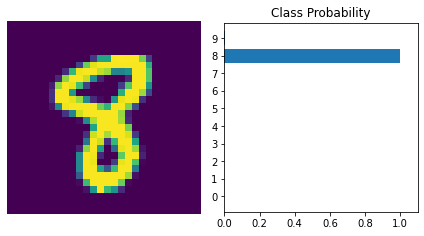

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9674
